# Tarea # 2 

In [1]:
# Importar paquetes
import pymysql
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Cargar el conjunto de datos
data = pd.read_csv('Credit_ONE')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  30201 non-null  int64 
 1   ID                          30201 non-null  int64 
 2   LIMIT_BAL                   30201 non-null  int64 
 3   SEX                         30201 non-null  object
 4   EDUCATION                   30201 non-null  object
 5   MARRIAGE                    30201 non-null  int64 
 6   AGE                         30201 non-null  int64 
 7   PAY_0                       30201 non-null  int64 
 8   PAY_2                       30201 non-null  int64 
 9   PAY_3                       30201 non-null  int64 
 10  PAY_4                       30201 non-null  int64 
 11  PAY_5                       30201 non-null  int64 
 12  PAY_6                       30201 non-null  int64 
 13  BILL_AMT1                   30201 non-null  in

In [4]:
#Validacion para analizar si hay valores faltantes
print(data.isna().sum())

Unnamed: 0                    0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [5]:
#Eliminacion de la columna sin nombre
credit = data.drop( columns = ['Unnamed: 0'])

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30201 non-null  int64 
 1   LIMIT_BAL                   30201 non-null  int64 
 2   SEX                         30201 non-null  object
 3   EDUCATION                   30201 non-null  object
 4   MARRIAGE                    30201 non-null  int64 
 5   AGE                         30201 non-null  int64 
 6   PAY_0                       30201 non-null  int64 
 7   PAY_2                       30201 non-null  int64 
 8   PAY_3                       30201 non-null  int64 
 9   PAY_4                       30201 non-null  int64 
 10  PAY_5                       30201 non-null  int64 
 11  PAY_6                       30201 non-null  int64 
 12  BILL_AMT1                   30201 non-null  int64 
 13  BILL_AMT2                   30201 non-null  in

In [7]:
#Validacion para entender distribucion de los default
credit.groupby(by = "default payment next month").size()

default payment next month
default         6682
not default    23519
dtype: int64

<AxesSubplot:title={'center':'Porcentajes Default'}, ylabel='default payment next month'>

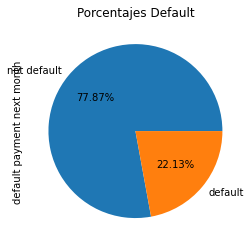

In [8]:
# Distrubcion de default por genero
credit["default payment next month"].value_counts().plot( kind = 'pie', autopct = '%.2f%%',
                                                        title = "Porcentajes Default")

In [13]:
Default_Genero = credit.groupby(["default payment next month",'SEX']).size()
Default_Genero

default payment next month  SEX   
default                     female     3786
                            male       2896
not default                 female    14431
                            male       9088
dtype: int64

In [14]:
Default_Genero = Default_Genero.reset_index()
Default_Genero

,default payment next month,SEX,0
0,default,female,3786
1,default,male,2896
2,not default,female,14431
3,not default,male,9088


In [15]:
Default_Genero = pd.pivot_table(Default_Genero, columns = 'default payment next month', index = 'SEX', values = 0)
Default_Genero 

default payment next month,default,not default
SEX,,
female,3786,14431
male,2896,9088


<AxesSubplot:title={'center':'Default por Genero'}, xlabel='SEX'>

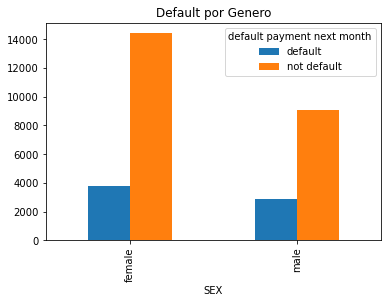

In [16]:
Default_Genero.plot(kind = 'bar', title = 'Default por Genero')

In [17]:
#Transformacion de variables a numericas
credit = pd.get_dummies(credit)

In [18]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   ID                                      30201 non-null  int64
 1   LIMIT_BAL                               30201 non-null  int64
 2   MARRIAGE                                30201 non-null  int64
 3   AGE                                     30201 non-null  int64
 4   PAY_0                                   30201 non-null  int64
 5   PAY_2                                   30201 non-null  int64
 6   PAY_3                                   30201 non-null  int64
 7   PAY_4                                   30201 non-null  int64
 8   PAY_5                                   30201 non-null  int64
 9   PAY_6                                   30201 non-null  int64
 10  BILL_AMT1                               30201 non-null  int64
 11  BILL_AMT2      

In [19]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')


In [20]:
credit = credit.drop( columns = ['default payment next month_not default','SEX_female'])

In [21]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'default payment next month_default'],
      dtype='object')


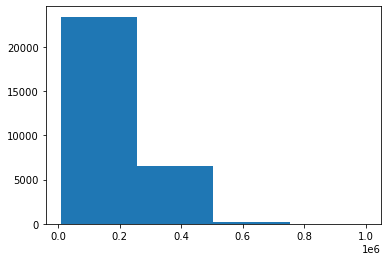

In [22]:
plt.hist(credit['LIMIT_BAL'], bins = 4)
plt.show()

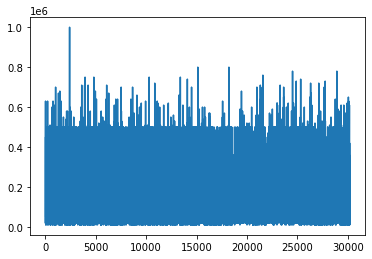

In [23]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

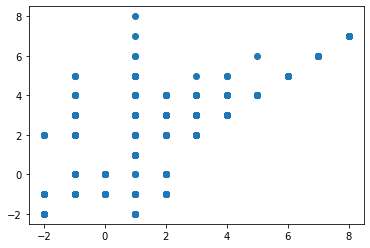

In [24]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

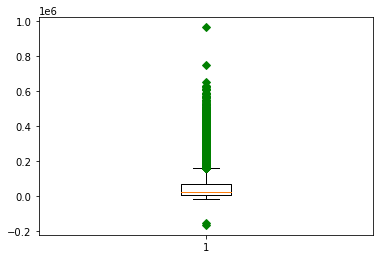

In [25]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [26]:
corrMat = credit.corr()
print(corrMat)

                                          ID  LIMIT_BAL  MARRIAGE       AGE  \
ID                                  1.000000   0.025781 -0.030762  0.019679   
LIMIT_BAL                           0.025781   1.000000 -0.109024  0.146340   
MARRIAGE                           -0.030762  -0.109024  1.000000 -0.414769   
AGE                                 0.019679   0.146340 -0.414769  1.000000   
PAY_0                              -0.030847  -0.271197  0.020399 -0.039523   
PAY_2                              -0.010728  -0.296601  0.024421 -0.050396   
PAY_3                              -0.018823  -0.285772  0.032552 -0.053452   
PAY_4                              -0.002375  -0.267111  0.033364 -0.049858   
PAY_5                              -0.022670  -0.249155  0.035837 -0.053864   
PAY_6                              -0.020165  -0.235144  0.034540 -0.048828   
BILL_AMT1                           0.019936   0.285503 -0.024432  0.057050   
BILL_AMT2                           0.018272   0.278

In [27]:
covMat = credit.cov()
print(covMat)

                                              ID     LIMIT_BAL     MARRIAGE  \
ID                                  7.597102e+07  2.916637e+07  -139.943327   
LIMIT_BAL                           2.916637e+07  1.684722e+10 -7385.897354   
MARRIAGE                           -1.399433e+02 -7.385897e+03     0.272418   
AGE                                 1.581796e+03  1.751674e+05    -1.996406   
PAY_0                              -3.021018e+02 -3.955137e+04     0.011963   
PAY_2                              -1.119813e+02 -4.610215e+04     0.015264   
PAY_3                              -1.964348e+02 -4.441187e+04     0.020343   
PAY_4                              -2.419367e+01 -4.052512e+04     0.020355   
PAY_5                              -2.239598e+02 -3.665423e+04     0.021200   
PAY_6                              -2.022096e+02 -3.511374e+04     0.020740   
BILL_AMT1                           1.279328e+07  2.728330e+09  -938.872032   
BILL_AMT2                           1.133656e+07  2.

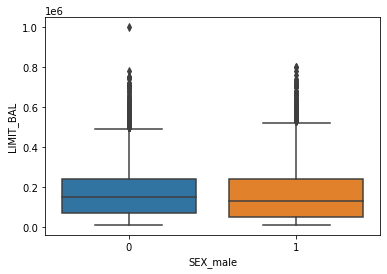

In [28]:
sns.boxplot(x='SEX_male', y='LIMIT_BAL',data=credit)
plt.show()

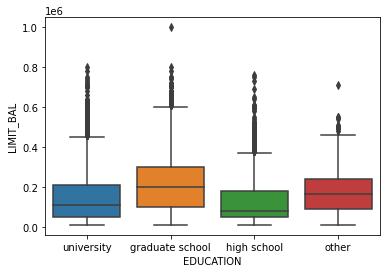

In [29]:
sns.boxplot(x='EDUCATION', y='LIMIT_BAL',data=data)
plt.show()

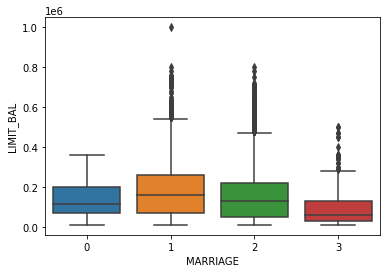

In [30]:
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL',data=data)
plt.show()

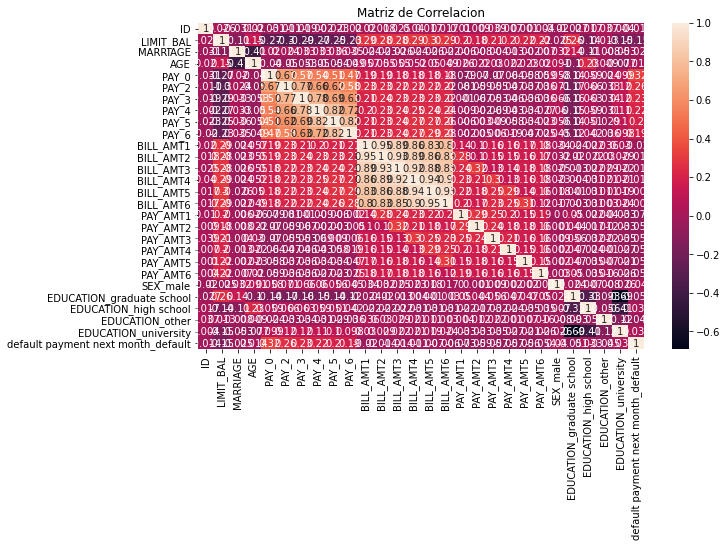

In [31]:
correlation_mat = credit.corr()
correlation_mat = round(credit.corr(),3)
plt.figure(figsize = (10,6))
plt.title('Matriz de Correlacion')
sns.heatmap(correlation_mat, annot = True)
plt.show()